In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file_path = '/Users/tibetkarayazgan/Desktop/Film_DataSci/data/ThrowbackDataThursdayFilm.csv'
film_df = pd.read_csv(file_path)

display(film_df.describe())

display(film_df.head())


,index,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
count,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,149.500000,2006.963333,46.700000,7.382075e+08,1.078744e+08,9.676330e+08,1.350016e+08,1.766255e+08
std,86.746758,6.801189,60.938398,8.783016e+08,1.227454e+08,1.101026e+09,1.395006e+08,1.737089e+08
min,0.000000,1995.000000,1.000000,2.010000e+03,2.250000e+02,2.018000e+03,2.010000e+03,2.018000e+03
25%,74.750000,2001.000000,6.000000,5.786591e+07,8.275600e+06,7.423214e+07,2.528707e+07,3.603908e+07
50%,149.500000,2007.000000,25.000000,3.694118e+08,5.634667e+07,5.054296e+08,9.351396e+07,1.223360e+08
75%,224.250000,2013.000000,56.250000,1.294524e+09,1.859968e+08,1.668391e+09,1.886230e+08,2.841907e+08
max,299.000000,2018.000000,287.000000,4.159138e+09,4.851841e+08,4.352101e+09,7.422089e+08,8.478831e+08


,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


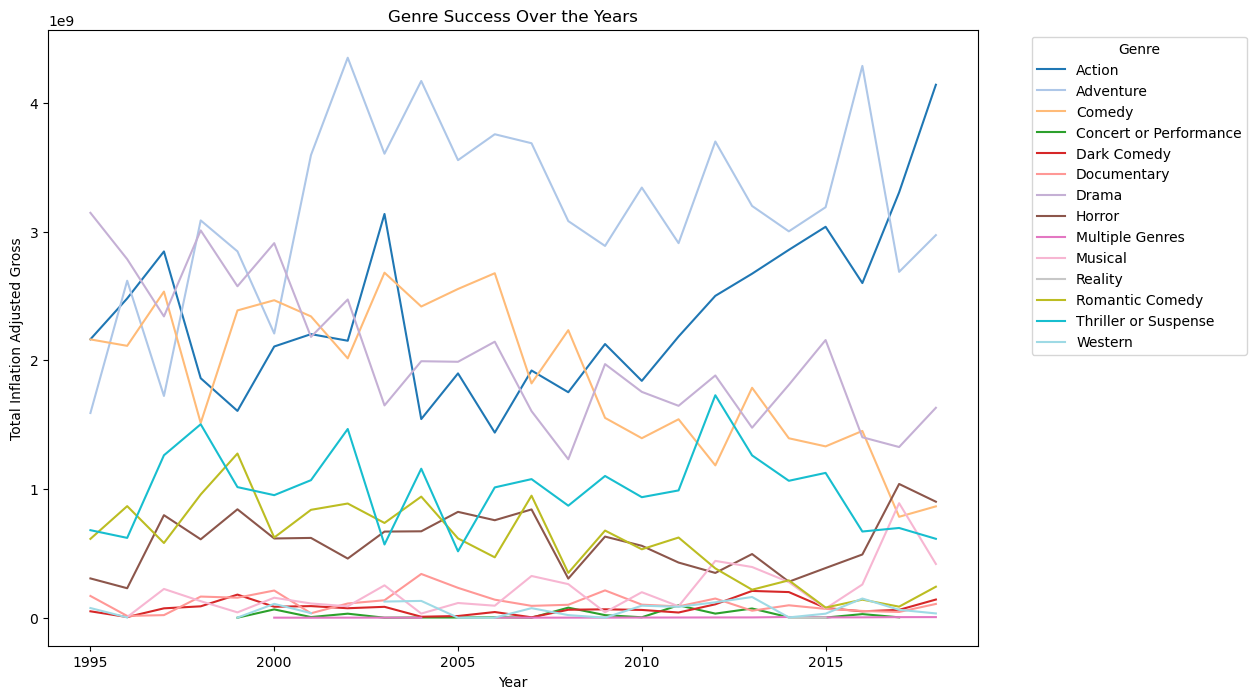

In [22]:
# Goal 1
# I will visually depict the financial success of each genre throughout the years
# For these, the following columns will be utilized: "Genre", "Year", "Inflation Adjusted Gross"

#creating the df, but we don't want multi-index, so I unstack them.
genre_year_success = film_df.groupby(['Year','Genre'])['Inflation-Adjusted Gross'].sum().unstack()

genre_no = genre_year_success.shape[1]

#we want unique colors for each genre
colors = plt.get_cmap('tab20', genre_no)

#creating the graph
genre_year_success.plot(figsize=(12,8), title='Genre Success Over the Years', color=[colors(i) for i in range(genre_no)])

plt.ylabel('Total Inflation Adjusted Gross')
plt.xlabel('Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

RangeIndex(start=0, stop=24, step=1)


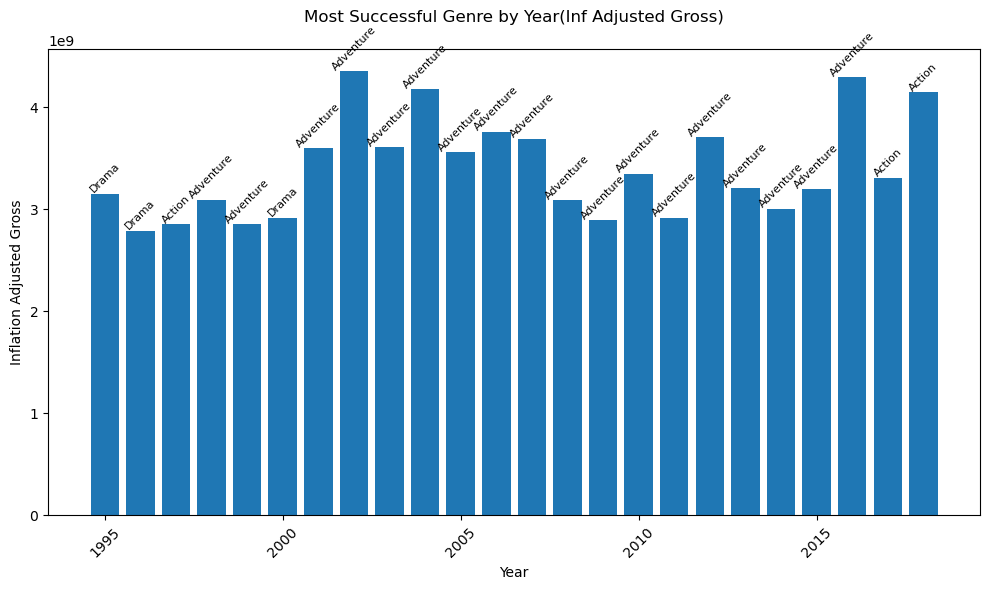

In [91]:
# Goal 2
# Find the most successful genre in each year & graph it.

genre_year_success.reset_index()

most_successful_genre_dict = {}

for index, row in genre_year_success.iterrows():
    year = index

    most_successful_genre = row.idxmax()
    max_revenue = row.max()

    most_successful_genre_dict[year] = {'genre' : most_successful_genre, 'revenue' : max_revenue}

#print(most_successful_genre_dict)
most_successful_df = pd.DataFrame.from_dict(most_successful_genre_dict, orient="index")

most_successful_df.index.name = 'year'
most_successful_df = most_successful_df.reset_index()
print(most_successful_df.index)

#print(most_successful_df)


plt.figure(figsize=(10,6))
plt.bar(most_successful_df['year'], most_successful_df['revenue'])

plt.xlabel('Year')
plt.ylabel('Inflation Adjusted Gross')
plt.xticks(rotation=45)
plt.title('Most Successful Genre by Year(Inf Adjusted Gross)', pad =20)
plt.tight_layout()

#labeling each bar
for (year, revenue, genre) in zip(most_successful_df['year'], most_successful_df['revenue'], most_successful_df['genre']):
    plt.text(year, revenue, genre, ha='center', va='bottom', rotation=45, fontsize=8)


